In [1]:
clc; clear; 
close all;
pkg load image;


ans =
{
  [1,1] = fltk
  [1,2] = gnuplot
}



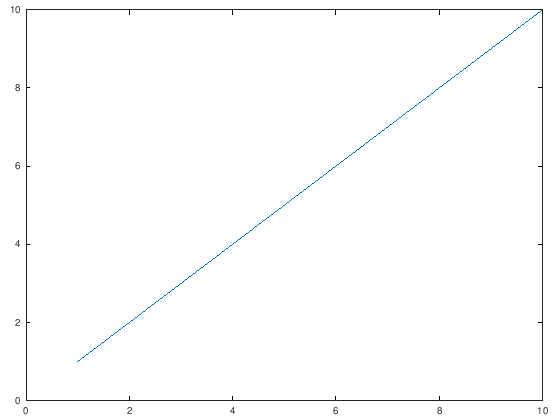

In [3]:
available_graphics_toolkits()
plot (1:10);
graphics_toolkit ("gnuplot");

ans =

   80   80



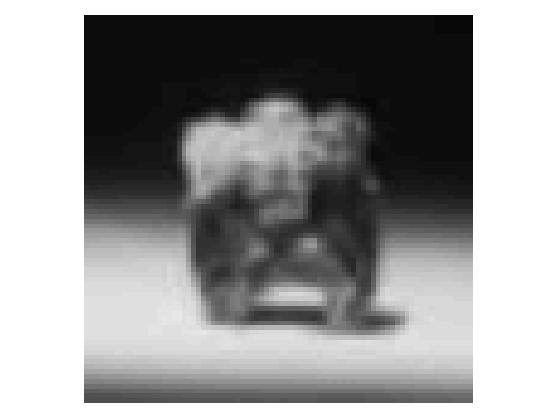

In [17]:
I_color = imread("WingedFigure2.jpg");
A = I_color(:,:,1);
A =im2double(A)*255;
size(A)
imshow(A, [0 255]);

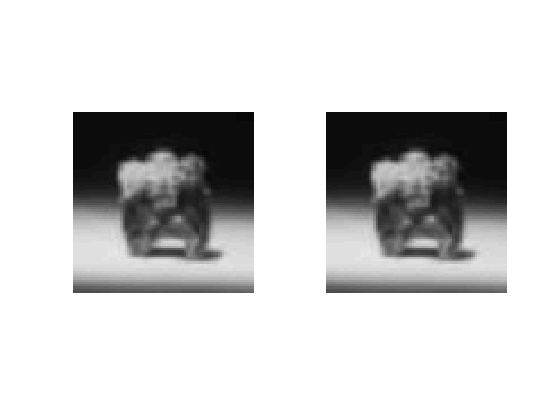

In [5]:
function  plot2images(image1, image2)
  figure;
  subplot(1,2,1);
  imshow(image1, [0, 255]);
  subplot(1,2,2);
  imshow(image2, [0, 255]);
end

function  plot3images(image1, image2, image3)
  figure;
  subplot(1,3,1);
  imshow(image1,[0, 255]);
  subplot(1,3,2);
  imshow(image2,[0, 255]);
  subplot(1,3,3);
  imshow(image3,[0, 255]);
end
plot2images(A, A);

In [6]:
function [ tag,u,p, original_len] = arith_enc(input_data)
   
   % length of the string
   len = length(input_data);

   % get unique characters from the string
   u = unique(input_data);
   
   % length of the unique characters string
   len_unique = length(u);
   % General lookup table
   
   % get zeros of length of unique characters
   z = zeros(1, len_unique);
   p = zeros(1, len_unique);
   
   for i = 1 : len_unique
   
      % in 'z' variable we will find the 
      % occurrence of each characters from 'str'  
      z(i) = length(find(input_data== u(i)));
   
      % in 'p' variable we will get 
      % probability of those occurrences
      p(i) = z(i) / len;
   end

   
   % in 'cpr' variable we will get the cumulative 
   % summation of 'p' from '1' till last value of 'p'
   cpr = cumsum(p);
   
   % in 'newcpr' variable we are taking 
   % 'cpr' from '0' till last value of 'p' 
   newcpr = [0 cpr];
   

   
   % make table till 'len_unique' size
   for i = 1 : len_unique
   
      % in first column we are then 
      % placing 'newcpr' values
      interval(i, 1) = newcpr(i);
   
      % in second column we are 
      % placing 'cpr' values
      interval(i, 2) = cpr(i);
   end
   
   % Encoder Table
   low = 0;
   high = 1;
   for i = 1 : len
      for j = 1 : len_unique
   
         % if the value from 'str'
         % matches with 'u' then
         if input_data(i) == u(j);
            pos = j;
            j = j + 1;
   
            % getting the tag value 
            % of the matched character
            range = high - low;
            high = low + (range .* interval(pos, 2));
            low = low + (range .* interval(pos, 1));
            i = i + 1;
            break
         end
      end
   end
   tag = low;
   original_len=len;
endfunction

function decoded_data = arith_dec(tag,u,p,original_len)
decoded_data=[];
len_unique=length(u);


   cpr = cumsum(p);
   newcpr = [0 cpr];
   for i = 1 : len_unique
      interval(i, 1) = newcpr(i);
      interval(i, 2) = cpr(i);
   end



% while 1
for i = 1 : original_len
for j = 1 : len_unique
		if tag > interval(j, 1) && tag < interval(j, 2)
		pos = j;
		tag = (tag - interval(pos, 1)) / p(j);
		decoded_num = u(pos);
		decoded_data = [decoded_data decoded_num];
		break
	end
end
end
endfunction


In [7]:
% input_data = [ 1 2 3 4 5 2 1 1 1 2 3 4 3 4];
EOF = 255;
input_data = [randi(6,1,20)];

[ tag,u, p,original_len] = arith_enc(input_data);

decoded_data = arith_dec(tag,u,p,original_len);

decoded_data

decoded_data==input_data

decoded_data =

   6   6   6   2   2   4   6   6   5   5   1   5   3   2   3   2   3   4   5   6

ans =

  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1



In [62]:
function w = generate_random_weights(N)
  w = rand(N,1);
  w = w/sum(w);
  return;
end

function [minimized_matrix,limited_data] = minimize_matrix_size(input_matrix,w)
% function [minimized_matrix, limited_data] = minimize_matrix_size(input_matrix, w)
  [C, ia, ic] = unique(input_matrix(:),'sorted');
  limited_data=C;
  % min_ld = C(1);
  % max_ld = C(end);

  k=3;
  % w = generate_random_weights(k);
  intermediate_matrix = input_matrix(:);
  % min_ld = min(intermediate_matrix);
  % max_ld = max(intermediate_matrix);
  [m, n] = size(intermediate_matrix);
  intermediate_matrix = vertcat(intermediate_matrix, zeros(k-mod(m,k),1));
  [m, n] = size(intermediate_matrix);
  minimized_matrix=zeros(m/3,1);
  for p=1:m/k
      % minimized_matrix(p)= sum(intermediate_matrix(1:3).* w);
      minimized_matrix(p)= intermediate_matrix(1)* w(1) + intermediate_matrix(2)* w(2) + intermediate_matrix(3)* w(3);


      intermediate_matrix=intermediate_matrix(4:end);
  end

end


function [value_matrix, zero_matrix] = generate_value_matrix(minimized_matrix)
value_matrix = [minimized_matrix(1)];
zero_matrix = [0; 0];
i = 2;
zero_counter=0;
while i<=size(minimized_matrix,1)
  if minimized_matrix(i)==0
    zero_counter=zero_counter+1;
    zero_matrix(end)=zero_counter;
  else
    value_matrix = [value_matrix; minimized_matrix(i)];
    zero_matrix = [zero_matrix; 0; 0;];
    zero_counter=0;
  end
  i=i+1;
end
endfunction


function minimized_matrix = decompose_value_matrix(value_matrix, zero_matrix)
  minimized_matrix=[];
  for i=1:length(value_matrix)
    minimized_matrix=[minimized_matrix; value_matrix(i); zeros(zero_matrix(i*2),1)];
  endfor
endfunction



In [9]:
 gw = generate_random_weights(3)


Q=20;
B = floor((randi(60,4)-60/2)/Q)
w = generate_random_weights(3);
[minimized_matrix, limited_data] = minimize_matrix_size(B,w);
% [minimized_matrix, min_ld, max_ld] = minimize_matrix_size(B);
limited_data
minimized_matrix


HFC = [5 0 0 0 0 0.3 0 0 0 0 -1 0 0 0 0 0 0 0 0 2.4  0 0 0 0](:);
[value_matrix, zero_matrix] = generate_value_matrix(HFC)
minimized_matrix = decompose_value_matrix(value_matrix, zero_matrix)
minimized_matrix==HFC

gw =

   0.2230
   0.3710
   0.4061

B =

   0   1   0  -2
  -2   0   1   0
   0  -2  -2  -2
  -1   0   0   1

limited_data =

  -2
  -1
   0
   1

minimized_matrix =

  -0.7451
   0.2498
  -0.2455
  -0.6223
  -1.2549
   0.1228

value_matrix =

   5.0000
   0.3000
  -1.0000
   2.4000

zero_matrix =

   0
   4
   0
   4
   0
   8
   0
   4

minimized_matrix =

   5.0000
        0
        0
        0
        0
   0.3000
        0
        0
        0
        0
  -1.0000
        0
        0
        0
        0
        0
        0
        0
        0
   2.4000
        0
        0
        0
        0

ans =

  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1



In [10]:
function mid = binarySearchRec(list,value,low,high)
    if( high < low )
        mid = [];
        return
    end
    mid = floor((low + high)/2);
    if( list(mid) > value )
        mid = binarySearchRec(list,value,low,mid-1);
        return
    elseif( list(mid) < value )
        mid = binarySearchRec(list,value,mid+1,high);
        return
    else
        return
    end
end

In [11]:
% A = [1 1 1 3 6 2 2 2 3 4 3 3];
function [unique_elements, r_vector,R] = countElements(input_array) 
    A=input_array(:);
    unique_elements = unique(A);
    r_vector=histc(A,unique_elements);
    R=sum(r_vector);
endfunction

% A = [1 1 1 3 6 2 2 2 3 4 3 3];
% [unique_elements, r_vector,R] = countElements(A)

In [13]:
new_map1 = create_block_map();
new_map2 = create_block_map();
A = {}
A=[A; {new_map1}];
A=[A; {new_map1}];
A=[A; {new_map1}];
A=[A; {new_map1}];
A=[A; {new_map1}];
A=[A; {new_map1}];

size(A)
A


A = {}(0x0)
ans =

   6   1

A =
{
  [1,1] =

    containers.Map object with properties:

               Count: [1x1 uint64]
             KeyType: char
           ValueType: any
                 map: [1x1 struct]
        numeric_keys: 0

  [2,1] =

    containers.Map object with properties:

               Count: [1x1 uint64]
             KeyType: char
           ValueType: any
                 map: [1x1 struct]
        numeric_keys: 0

  [3,1] =

    containers.Map object with properties:

               Count: [1x1 uint64]
             KeyType: char
           ValueType: any
                 map: [1x1 struct]
        numeric_keys: 0

  [4,1] =

    containers.Map object with properties:

               Count: [1x1 uint64]
             KeyType: char
           ValueType: any
                 map: [1x1 struct]
        numeric_keys: 0

  [5,1] =

    containers.Map object with properties:

               Count: [1x1 uint64]
             KeyType: char
           ValueType: any
          

In [25]:
function new_map = create_block_map()
keySet = {'min_ld', 'max_ld', "zero_m_len", 'zero_m_p', 'zero_m_u', "value_m_len", 'value_m_p', 'value_m_u', 'limited_data', 'zero_m_tag', 'value_m_tag'};
valueSet = {0,0,0,[],[],0,[],[],[],0,0};
new_map = containers.Map(keySet,valueSet);
endfunction

In [45]:
function  [LFC, real_blocks, imaginary_blocks]=imageCompression(input_img, w, quantization=20 )
[M N] = size(input_img)
rows = floor(M / 4)
cols = floor(N / 4)
LFC = zeros(rows, cols);

imaginary_blocks={};
real_blocks={};

% min_max_r = [];
% min_max_i = [];
% image_limited_data_r = [];
% image_limited_data_i = [];
% minimized_r=[];
% minimized_i=[];
for x = 1:rows
    new_row_r = [];
    new_row_i = [];
    for y = 1:cols
        Bk = input_img(1 + (4 * (x - 1)):(4 * (x)), 1 + (4 * (y - 1)):(4 * (y)));
        ff = fft2(Bk);
        ff_real = real(ff);
        ff_imag = imag(ff);
        Qr = floor(ff_real / quantization);
        Qi = floor(ff_imag / quantization);
        LFC(x, y) = Qr(1, 1);
        Qr(1, 1) = 0;
        

        [minimized_matrix_r, limited_data_r] = minimize_matrix_size(Qr,w);
        [value_matrix_r, zero_matrix_r] = generate_value_matrix(minimized_matrix_r);
        [ tag_values,u_values, p_values,original_len_values] = arith_enc(value_matrix_r);
        [ tag_zero,u_zero, p_zero,original_len_zero] = arith_enc(zero_matrix_r);

        if (tag_zero ==0)
            disp("????")
            u_zero
            p_zero
            original_len_zero
        endif

        new_map_r = create_block_map();
        new_map_r('min_ld') = limited_data_r(1);
        new_map_r('max_ld') = limited_data_r(end);
        new_map_r('zero_m_len') = original_len_zero;
        new_map_r('zero_m_p') = p_zero;
        new_map_r('zero_m_u') = u_zero;
        new_map_r('zero_m_tag') = tag_zero;
        
        new_map_r('value_m_len') = original_len_values;
        new_map_r('value_m_p') = p_values;
        new_map_r('value_m_u') = u_values;
        new_map_r('limited_data') = limited_data_r;
        new_map_r('value_m_tag') = tag_values;

        real_blocks= [real_blocks ; {new_map_r}];
        
        % min_max_r = [min_max_r; [ limited_data_r(1) limited_data_r(end) ]];
        % image_limited_data_r = [image_limited_data_r; limited_data_r];
        % minimized_r = [minimized_r minimized_matrix_r];

        [minimized_matrix_i, limited_data_i] = minimize_matrix_size(Qi,w);
        [value_matrix_i, zero_matrix_i] = generate_value_matrix(minimized_matrix_i);
        [ tag_values,u_values, p_values,original_len_values] = arith_enc(value_matrix_i);
        [ tag_zero,u_zero, p_zero,original_len_zero] = arith_enc(zero_matrix_i);
        
        new_map_i = create_block_map();
        new_map_i('min_ld') = limited_data_i(1);
        new_map_i('max_ld') = limited_data_i(end);
        new_map_i('zero_m_len') = original_len_zero;
        new_map_i('zero_m_p') = p_zero;
        new_map_i('zero_m_u') = u_zero;
        new_map_i('value_m_len') = original_len_values;
        new_map_i('value_m_p') = p_values;
        new_map_i('value_m_u') = u_values;
        new_map_i('limited_data') = limited_data_i;
        imaginary_blocks= [imaginary_blocks ; {new_map_i}];
        % imaginary_blocks= {imaginary_blocks ; new_map_i};

        % min_max_i = [min_max_i; [ limited_data_i(1) limited_data_i(end) ]];
        % image_limited_data_i = [image_limited_data_i; limited_data_i];
        % minimized_i = [minimized_i minimized_matrix_i];



    endfor
endfor
% [image_limited_data_r, ~, ~] = unique(image_limited_data_r,'sorted');
% [image_limited_data_i, ~, ~] = unique(image_limited_data_i,'sorted');


% [min_matrix_r, limited_data_r]=minimize_matrix_size(real_matrix);
% [min_matrix_i, limited_data_i]=minimize_matrix_size(imaginary_matrix);
% [value_matrix_r, zero_matrix_r] = generate_value_matrix(minimized_r(:));
% [value_matrix_i, zero_matrix_i] = generate_value_matrix(minimized_i(:));
endfunction

% [ tag,u, p,original_len] = arith_enc(input_data);



In [33]:
 w = generate_random_weights(3)

[LFC, image_limited_data_r, image_limited_data_i, value_matrix_r,zero_matrix_r, value_matrix_i, zero_matrix_i , min_max_r , min_max_i]=imageCompression(A, w, quantization=20 );


w =

   0.413245
   0.082219
   0.504536

error: element number 4 undefined in return list


In [46]:
 w = generate_random_weights(3)
[LFC, real_blocks, imaginary_blocks] = imageCompression(A, w, quantization=5 );

w =

   0.014500
   0.199932
   0.785567
























































































































































































































































































































































































































































































































































original_len_zero = 12


In [19]:

size(LFC)
size(real_blocks) 
size(imaginary_blocks)


ans =

   20   20

ans =

   400     1

ans =

   400     1



max(A)

In [ ]:
save('images1.mat', 'w', 'LFC','real_blocks', 'imaginary_blocks', fmt='-mat');

In [43]:
% keySet = {'min_ld', 'max_ld', "zero_m_len", 'zero_m_p', 'zero_m_u', "value_m_len", 'value_m_p', 'value_m_u', 'limited_data'};

function result_image = decompress_image(M, N, LFC, imaginary_blocks, real_blocks,w, quantization)
    result_image = zeros(M, N);
    rows = floor(M / 4);
    cols = floor(N / 4);
    for x = 1:rows
        for y = 1:cols
        zero_m_len = real_blocks{x*4+y}('zero_m_len');
        zero_m_p = real_blocks{x*4+y}('zero_m_p');
        zero_m_u = real_blocks{x*4+y}('zero_m_u');
        zero_m_tag = real_blocks{x*4+y}('zero_m_tag');
        zero_matrix = arith_dec(zero_m_tag,zero_m_u,zero_m_p,zero_m_len);

        if length(zero_matrix) == 0
            zero_m_tag
            zero_m_u
            zero_m_p
            zero_m_len
        endif


        value_m_len = real_blocks{x*4+y}('value_m_len');
        value_m_p = real_blocks{x*4+y}('value_m_p');
        value_m_u = real_blocks{x*4+y}('value_m_u');
        value_m_tag = real_blocks{x*4+y}('value_m_tag');
        value_matrix = arith_dec(value_m_tag,value_m_u,value_m_p,value_m_len);
        

        minimized_matrix_r = decompose_value_matrix(value_matrix, zero_matrix);

        limited_data = real_blocks{x*4+y}('limited_data');
        min_ld =  real_blocks{x*4+y}('min_ld');
        max_ld =  real_blocks{x*4+y}('max_ld');

        



        endfor
    endfor
end


In [44]:
[M N] = size(A);

result_image = decompress_image(M, N, LFC, imaginary_blocks, real_blocks,w, quantization=5);

zero_m_tag = 0
zero_m_u = 0
zero_m_p = 1
zero_m_len = 12
error: zero_matrix(2): out of bound 0 (dimensions are 0x0)
error: called from
    decompose_value_matrix at line 4 column 21
    decompress_image at line 28 column 28


In [86]:
function deminimized_matrix = deminimize_matrix_size(minimized_matrix,w, limited_data)
    deminimized_matrix = [];
    length(minimized_matrix)
    m = length(limited_data);
    for i = 1:length(minimized_matrix)
        S1=1; S2=1; S3=1; 
        Est= w(1)*limited_data(S1) + w(2)*limited_data(S2) + w(3)*limited_data(S3);
        while minimized_matrix(i) - Est != 0
            S3=S3+1;
            if S3 > m
                S3 = 1;
                S2 = S2+1;
            endif
            if S2 > m
                S2 = 1;
                S1 = S1+1;
            endif
            if S1 > m
                S1 = 1;
            endif
            Est= w(1)*limited_data(S1) + w(2)*limited_data(S2) + w(3)*limited_data(S3);
        endwhile
        deminimized_matrix = [deminimized_matrix limited_data(S1) limited_data(S2) limited_data(S3)];
    endfor
    minimized_matrix_final= [ minimized_matrix(1:4)' ; minimized_matrix(5:8)' ; minimized_matrix(9:12)' ; minimized_matrix(13:16)' ];

end

In [87]:
B = floor((randi(60,4)-60/2)/Q)
w = generate_random_weights(3);
[minimized_matrix, limited_data] = minimize_matrix_size(B,w);
minimized_matrix

B =

  -1  -2   1  -1
  -1   0  -1   0
   0  -2   0   0
  -2   0   1   1

minimized_matrix =

  -0.8764
  -1.7527
  -0.6948
  -0.2856
  -0.4092
   0.4092



In [88]:
deminimized_matrix = deminimize_matrix_size(minimized_matrix,w, limited_data);
deminimized_matrix

ans = 6
minimized_matrix_final =

  -0.8764
  -1.7527
  -0.6948
  -0.2856

deminimized_matrix =

  -1  -1   0  -2  -2   0  -2   0   1  -1   0   1  -1   0   0   1   0   0



In [89]:
deminimized_matrix'

ans =

  -1
  -1
   0
  -2
  -2
   0
  -2
   0
   1
  -1
   0
   1
  -1
   0
   0
   1
   0
   0

